In [1]:
import pandas as pd
import os
import zipfile
from IPython.display import display, HTML

# Initialize an empty list to store the data
data = []

# Open the train_annotations.zip file
with zipfile.ZipFile('train_annotations.zip', 'r') as z:
    # Iterate over each file in the zip archive
    for file_name in z.namelist():
        if file_name.endswith('.txt'):
            # Extract the pothole_id from the file name
            pothole_id = file_name.split('.')[0][19:]

            # Initialize a dictionary to store the features for this pothole_id
            observation = {
                'pothole_id': pothole_id,
                'pothole_x': None,
                'pothole_y': None,
                'pothole_width': None,
                'pothole_height': None,
                'l1_x': None,
                'l1_y': None,
                'l1_width': None,
                'l1_height': None,
                'l2_x': None,
                'l2_y': None,
                'l2_width': None,
                'l2_height': None,
            }

            # Read the content of the .txt file
            with z.open(file_name) as file:
                lines = file.readlines()

            # Parse the content of the file
            for line in lines:
                line = line.decode('utf-8').strip()  # Decode and strip the line
                parts = line.split()
                object_class = int(parts[0])
                x = float(parts[1])
                y = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])

                if object_class == 0:  # Pothole bounding box
                    observation['pothole_x'] = x
                    observation['pothole_y'] = y
                    observation['pothole_width'] = width
                    observation['pothole_height'] = height
                elif object_class == 1:  # L1 bounding box
                    observation['l1_x'] = x
                    observation['l1_y'] = y
                    observation['l1_width'] = width
                    observation['l1_height'] = height
                elif object_class == 2:  # L2 bounding box
                    observation['l2_x'] = x
                    observation['l2_y'] = y
                    observation['l2_width'] = width
                    observation['l2_height'] = height

            # Append the dictionary to the data list
            data.append(observation)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# Load the train_labels.csv file into a DataFrame
train_labels = pd.read_csv('train_labels.csv')

# Merge the annotations DataFrame with the train_labels DataFrame based on pothole_id
# Convert pothole_id in both DataFrames to string for matching
train_labels['id'] = train_labels['Pothole number'].astype(str)
train_labels['num_bags'] = train_labels['Bags used '].astype(str)
df['pothole_id'] = df['pothole_id'].astype(str)

# Perform a left join to keep all annotations and add num_bags where available
df = pd.merge(df, train_labels[['id', 'num_bags']], how='left', left_on='pothole_id', right_on='id')

# Drop the redundant 'id' column after merging
df.drop(columns=['id'], inplace=True)

# Display the DataFrame in a scrollable and neat format
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent auto line breaks in columns

# Create an HTML table that is scrollable
display(HTML(df.to_html(notebook=True, max_rows=10, index=False)))

# Save the combined DataFrame to a CSV file if needed
df.to_csv('combined_data.csv', index=False)


pothole_id,pothole_x,pothole_y,pothole_width,pothole_height,l1_x,l1_y,l1_width,l1_height,l2_x,l2_y,l2_width,l2_height,num_bags
101,0.486675,0.537695,0.913915,0.908194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
102,0.567634,0.468268,0.355968,0.874786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1032,0.482333,0.521441,0.502573,0.665523,NaN,NaN,NaN,NaN,0.494340,0.593482,0.046312,0.723842,0.25
1033,0.426587,0.517153,0.473413,0.629503,0.542367,0.481132,0.162950,0.914237,NaN,NaN,NaN,NaN,0.25
1034,0.438593,0.734991,0.250429,0.361921,0.461750,0.359348,0.104631,0.557461,NaN,NaN,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0.485549,0.500000,0.939945,0.567753,0.232339,0.548885,0.456545,0.072041,0.679293,0.522298,0.506420,0.084048,1.5
497,0.614225,0.578902,0.174756,0.289880,0.606627,0.568611,0.141831,0.403087,NaN,NaN,NaN,NaN,2.0
498,0.393446,0.560034,0.211097,0.385935,0.428001,0.653516,0.157066,0.425386,NaN,NaN,NaN,NaN,0.5
499,0.409076,0.424528,0.233008,0.492281,0.404644,0.559177,0.051920,0.370497,0.377417,0.198971,0.048121,0.391081,1.5


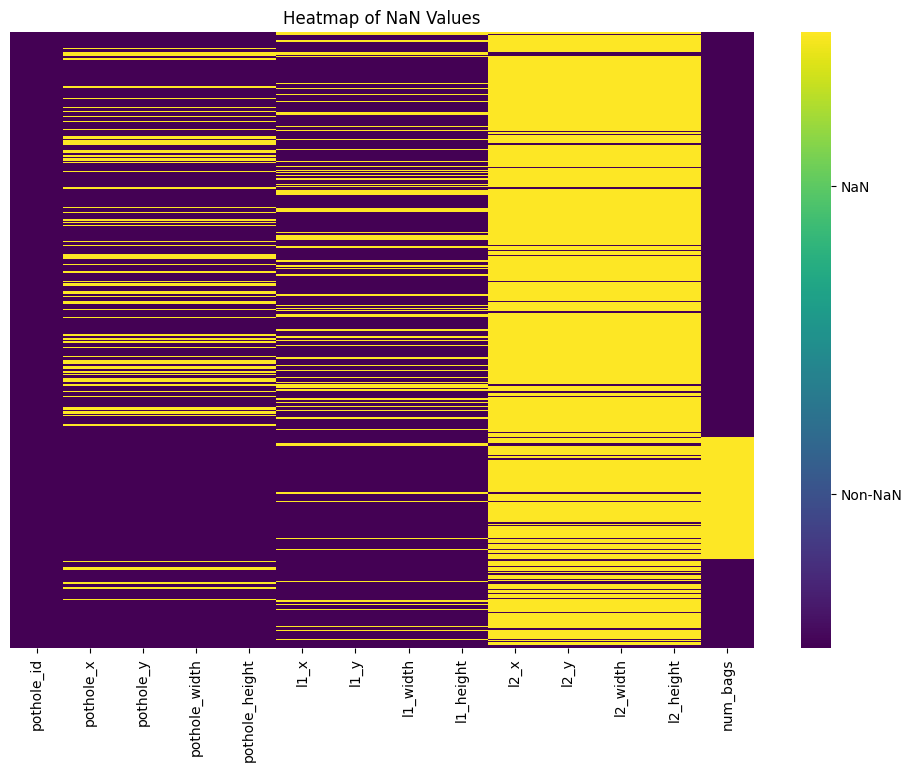

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('combined_data.csv')

# Create a heatmap of the NaN values
plt.figure(figsize=(12, 8))
# Create the heatmap with colorbar enabled
ax = sns.heatmap(df.isna(), cbar=True, cmap='viridis', yticklabels=False)

# Set the title and show the plot
plt.title('Heatmap of NaN Values')
plt.show()
